In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

INFILE = "C:\\Users\\Owner\\Documents\\Northwestern\\Intro_MachineLearning\\Assignment1\\DataSet\\HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )
dt = df.dtypes



In [2]:
print( df.head().T )
print('-----------------------')
print( df.dtypes )

                       0        1        2     3        4
TARGET_BAD_FLAG        1        1        1     1        0
TARGET_LOSS_AMT      641     1109      767  1425      NaN
LOAN                1100     1300     1500  1500     1700
MORTDUE            25860    70053    13500   NaN    97800
VALUE              39025    68400    16700   NaN   112000
REASON           HomeImp  HomeImp  HomeImp   NaN  HomeImp
JOB                Other    Other    Other   NaN   Office
YOJ                 10.5        7        4   NaN        3
DEROG                  0        0        0   NaN        0
DELINQ                 0        2        0   NaN        0
CLAGE            94.3667  121.833  149.467   NaN  93.3333
NINQ                   1        0        1   NaN        0
CLNO                   9       14       10   NaN       14
DEBTINC              NaN      NaN      NaN   NaN      NaN
-----------------------
TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float6

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


In [4]:
x = df.describe().T

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print(i)
##
print("  ")
print(" NUMBERS ")
print(" ------- ")
for i in numList :
    print(i)

 OBJECTS 
 ------- 
REASON
JOB
  
 NUMBERS 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [5]:
'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''

for i in objList :
    print(" Class = ", i )
    g = df.groupby( i )
    print( g[i].count() )
    x = g[ TARGET_F ].mean()
    print( "Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()
    print( "Default Amount", x )
    print(" ===============\n\n\n ")

 Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Default Prob REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Default Amount REASON
DebtCon    16005.163758
HomeImp     8388.090909
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  JOB
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
Default Prob JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Default Amount JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


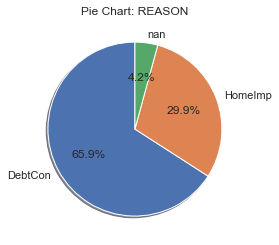

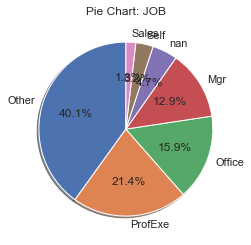

In [6]:
'''
CATEGORICAL PIE CHARTS
'''

for i in objList :
    x = df[ i ].value_counts(dropna=False)
    #print( x )
    theLabels = x.axes[0].tolist()
##    #print( theLabels )
    theSlices = list(x)
    #print( theSlices ) 
    plt.pie( theSlices,
             labels=theLabels,
             startangle = 90,
             shadow=True,
             autopct="%1.1f%%")
    plt.title("Pie Chart: " + i)
    plt.show()

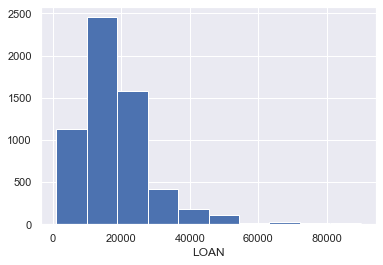

C:\Users\Owner\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Owner\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


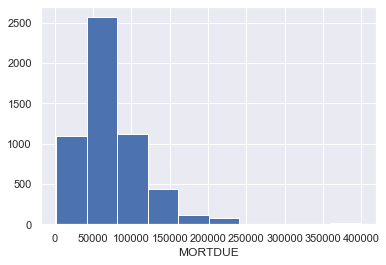

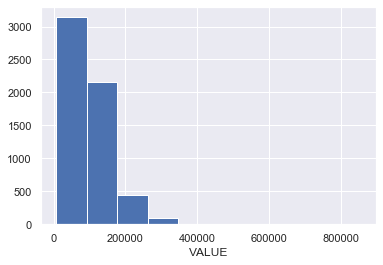

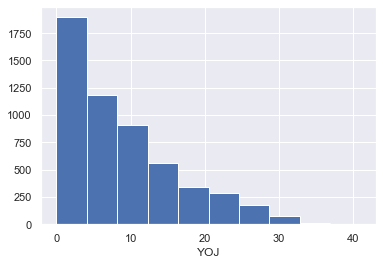

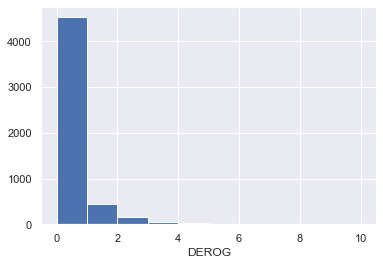

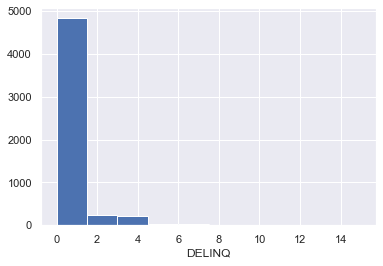

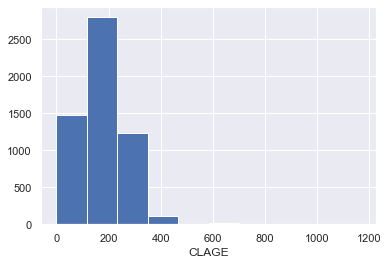

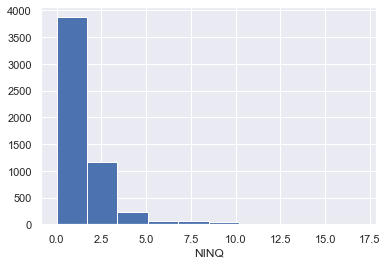

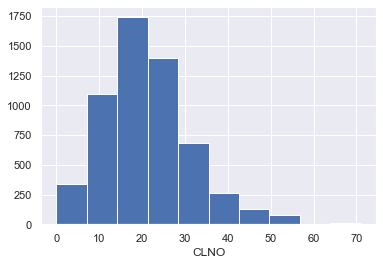

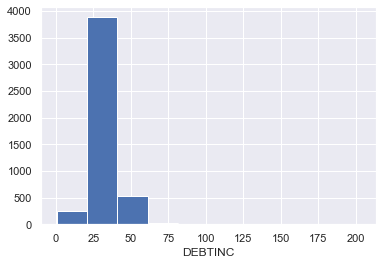

In [7]:
for i in numList :
    plt.hist( df[ i ] )
    plt.xlabel( i )
    plt.show()

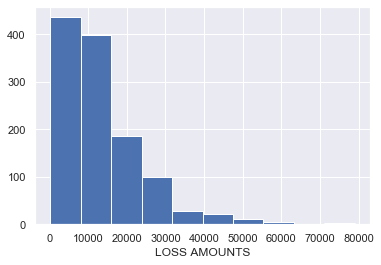

In [8]:
plt.hist( df[ TARGET_A ] )
plt.xlabel( "LOSS AMOUNTS" )
plt.show()

In [9]:
"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

 here is i ..... TARGET_BAD_FLAG  ..... and here is the type int64
 here is i ..... TARGET_LOSS_AMT  ..... and here is the type float64
 here is i ..... LOAN  ..... and here is the type int64
 here is i ..... MORTDUE  ..... and here is the type float64
 here is i ..... VALUE  ..... and here is the type float64
 here is i ..... YOJ  ..... and here is the type float64
 here is i ..... DEROG  ..... and here is the type float64
 here is i ..... DELINQ  ..... and here is the type float64
 here is i ..... CLAGE  ..... and here is the type float64
 here is i ..... NINQ  ..... and here is the type float64
 here is i ..... CLNO  ..... and here is the type float64
 here is i ..... DEBTINC  ..... and here is the type float64
 here is i ..... IMP_REASON  ..... and here is the type object
 here is i ..... IMP_JOB  ..... and here is the type object


In [10]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860,70053,13500,NaN,97800
VALUE,39025,68400,16700,NaN,112000
YOJ,10.5,7,4,NaN,3
DEROG,0,0,0,NaN,0
DELINQ,0,2,0,NaN,0
CLAGE,94.3667,121.833,149.467,NaN,93.3333
NINQ,1,0,1,NaN,0


In [11]:
dt = df.dtypes
objList = []
for i in dt.index :
    print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )

 here is i ..... TARGET_BAD_FLAG  ..... and here is the type int64
 here is i ..... TARGET_LOSS_AMT  ..... and here is the type float64
 here is i ..... LOAN  ..... and here is the type int64
 here is i ..... MORTDUE  ..... and here is the type float64
 here is i ..... VALUE  ..... and here is the type float64
 here is i ..... YOJ  ..... and here is the type float64
 here is i ..... DEROG  ..... and here is the type float64
 here is i ..... DELINQ  ..... and here is the type float64
 here is i ..... CLAGE  ..... and here is the type float64
 here is i ..... NINQ  ..... and here is the type float64
 here is i ..... CLNO  ..... and here is the type float64
 here is i ..... DEBTINC  ..... and here is the type float64
 here is i ..... IMP_REASON  ..... and here is the type object
 here is i ..... IMP_JOB  ..... and here is the type object


In [12]:
g = df.groupby("IMP_JOB")
i = "MORTDUE"
print( g[i].median() )

IMP_JOB
MISSING    58936.0
Mgr        76600.0
Office     62970.5
Other      54834.0
ProfExe    82802.5
Sales      71800.0
Self       88465.0
Name: MORTDUE, dtype: float64


In [13]:
g = df.groupby("IMP_JOB")
i = "VALUE"
print( g[i].median() )

IMP_JOB
MISSING     78227.0
Mgr        101258.0
Office      89094.5
Other       76599.5
ProfExe    110007.0
Sales       84473.5
Self       130631.0
Name: VALUE, dtype: float64


In [14]:
g = df.groupby("IMP_REASON")
i = "NINQ"
print( g[i].median() )

IMP_REASON
DebtCon    1.0
HomeImp    0.0
MISSING    0.0
Name: NINQ, dtype: float64


In [15]:
i = "MORTDUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 58936
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 76600
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 62970
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 54834
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 82802
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 71800
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 88465
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 78227
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 101258
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 89094
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 76599
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 110007
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 84473
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 130631
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

i = "NINQ"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["DebtCon"]), IMP ] = 1
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["HomeImp"]), IMP ] = 0
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["MISSING"]), IMP ] = 0

df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)



for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )


for i in objList:
    df = df.drop( i, axis=1 )


df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_IMP_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_IMP_REASON_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_IMP_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000
